In [119]:
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt
im = plt.imread("input-tree.png")

In [120]:
im.shape

(1456, 1092, 4)

In [121]:
image_downscaled = downscale_local_mean(im, (26, 26, 1))

In [122]:
image_downscaled.shape

(56, 42, 4)

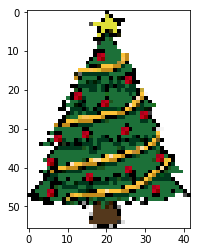

In [123]:
plt.imshow(image_downscaled)

In [124]:
import seaborn as sns
import numpy as np

In [125]:
colors = np.unique(image_downscaled.reshape((56*42, 4)), axis=0)

In [126]:
color_list = [tuple(color) for color in colors.tolist()]

In [127]:
color_dict = {color_list[i]: i for i in range(len(color_list))}

In [128]:
w, h = image_downscaled.shape[0], image_downscaled.shape[1]
image = np.zeros((w, h))
label_idx = 0
for i in range(w):
    for j in range(h):
        image[i][j] = color_dict[tuple(image_downscaled[i,j])]
        label_idx += 1

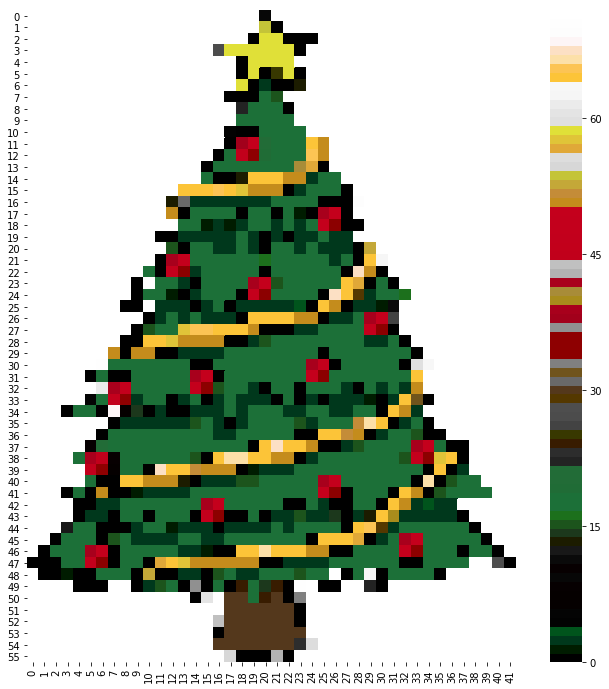

In [129]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(image, square = True, ax=ax, cmap = color_list)

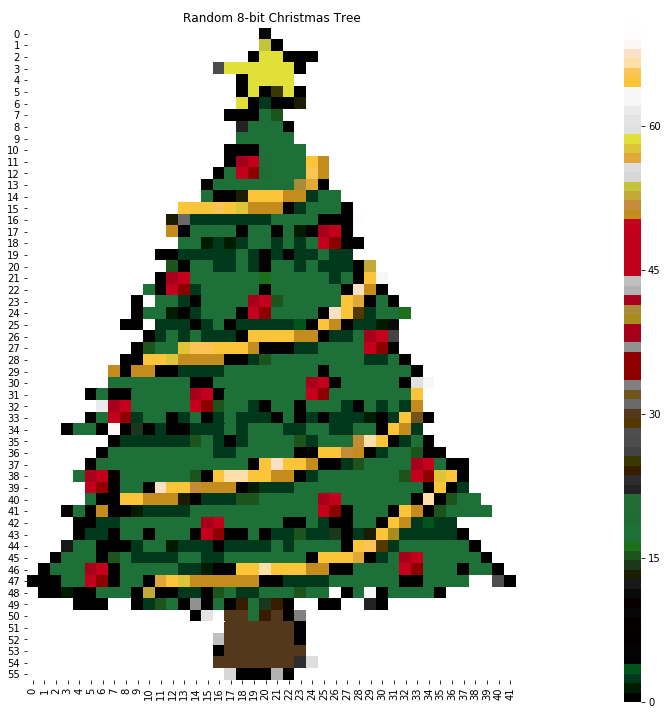

In [130]:
import matplotlib
import matplotlib.animation as animation

np.random.seed(42)

def animate(i):
    pallette = [tuple(color) for color in np.random.rand(len(color_list),4).tolist()]
    if i % 3 == 0:
        pallette = color_list
    return sns.heatmap(image, square = True, ax=ax, cbar_ax=cbar_ax, cmap = pallette)

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title("Random 8-bit Christmas Tree")
cbar_ax = fig.add_axes([.92, .1, .02, .8])
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=8, repeat=True)

In [131]:
from matplotlib import rcParams
rcParams.update({'animation.convert_path': 'D:/ImageMagick-7.0.8-Q16/magick.exe'})
from matplotlib.animation import ImageMagickFileWriter

writer = ImageMagickFileWriter(fps=4)
ani.save('random-tree.gif', writer=writer)

In [ ]:
from IPython.display import HTML
HTML(ani.to_jshtml())